In [1]:
# Import the libraries
import re
import torch
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup

c:\Users\harsh\anaconda3\envs\torchenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading the dataset
data = pd.read_csv(r'C:\Users\harsh\OneDrive\Desktop\CSE 676 Deep Learning\Project\Code\Datasets\Multi_Resolution-20240616T002539Z-001\Multi_Resolution\multi_class.csv')

In [3]:
data

,Tweet,Multi-Class Annotation,Aspect Annotation,Dataset
0,You’ll need more than that [URL],😅,You;need,test
1,[MENTION] who's gonna make me rich?,😅,rich,dev
2,RT [MENTION]: So excited to see this years Rio...,😅,So;excited;Rio;competitors;definitely;list;Abs...,train
3,RT [MENTION]: Honoured to have watched this la...,😅,lady;Absolutely,train
4,RT [MENTION]: The women is a machinneeeeeee [M...,😅,The;women,train
...,...,...,...,...
858209,[HASHTAG] Four years ago [MENTION] & I did thi...,🌸,Four;years;I;photo;Alexis;girl,train
858210,[HASHTAG] Four years ago [MENTION] & I did thi...,🌸,Four;years;&;I;photo;Alexis,train
858211,Honored to be in Allure’s October issue suppor...,🌸,October;supporting,train
858212,RT [MENTION]: play outside today [URL],🌸,outside;today,train


In [4]:
data['Aspect Annotation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 858214 entries, 0 to 858213
Series name: Aspect Annotation
Non-Null Count   Dtype 
--------------   ----- 
858207 non-null  object
dtypes: object(1)
memory usage: 6.5+ MB


In [5]:
# Text Cleaning
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text
data['cleaned_tweet'] = data['Tweet'].apply(clean_text)

In [6]:
def clean_aspect_ann(text):
    if not isinstance(text, str): # Check if text is a string
        text = str(text) # Convert to string if it's not
    text = re.sub(r';', ' ', text) # replace ';' with space
    text = text.lower() # convert to lowercase
    return text

data['cleaned_aspect'] = data['Aspect Annotation'].apply(clean_aspect_ann)

In [7]:
data

,Tweet,Multi-Class Annotation,Aspect Annotation,Dataset,cleaned_tweet,cleaned_aspect
0,You’ll need more than that [URL],😅,You;need,test,youll need more than that url,you need
1,[MENTION] who's gonna make me rich?,😅,rich,dev,mention whos gonna make me rich,rich
2,RT [MENTION]: So excited to see this years Rio...,😅,So;excited;Rio;competitors;definitely;list;Abs...,train,rt mention so excited to see this years rio co...,so excited rio competitors definitely list abs...
3,RT [MENTION]: Honoured to have watched this la...,😅,lady;Absolutely,train,rt mention honoured to have watched this lady ...,lady absolutely
4,RT [MENTION]: The women is a machinneeeeeee [M...,😅,The;women,train,rt mention the women is a machinneeeeeee menti...,the women
...,...,...,...,...,...,...
858209,[HASHTAG] Four years ago [MENTION] & I did thi...,🌸,Four;years;I;photo;Alexis;girl,train,hashtag four years ago mention i did this pho...,four years i photo alexis girl
858210,[HASHTAG] Four years ago [MENTION] & I did thi...,🌸,Four;years;&;I;photo;Alexis,train,hashtag four years ago mention i did this pho...,four years & i photo alexis
858211,Honored to be in Allure’s October issue suppor...,🌸,October;supporting,train,honored to be in allures october issue support...,october supporting
858212,RT [MENTION]: play outside today [URL],🌸,outside;today,train,rt mention play outside today url,outside today


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858214 entries, 0 to 858213
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Tweet                   858214 non-null  object
 1   Multi-Class Annotation  858214 non-null  object
 2   Aspect Annotation       858207 non-null  object
 3   Dataset                 858214 non-null  object
 4   cleaned_tweet           858214 non-null  object
 5   cleaned_aspect          858214 non-null  object
dtypes: object(6)
memory usage: 39.3+ MB


In [9]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [10]:
label_encoder = LabelEncoder()
data['emoji_label'] = label_encoder.fit_transform(data['Multi-Class Annotation'])

In [11]:
data

,Tweet,Multi-Class Annotation,Aspect Annotation,Dataset,cleaned_tweet,cleaned_aspect,emoji_label
0,You’ll need more than that [URL],😅,You;need,test,youll need more than that url,you need,35
1,[MENTION] who's gonna make me rich?,😅,rich,dev,mention whos gonna make me rich,rich,35
2,RT [MENTION]: So excited to see this years Rio...,😅,So;excited;Rio;competitors;definitely;list;Abs...,train,rt mention so excited to see this years rio co...,so excited rio competitors definitely list abs...,35
3,RT [MENTION]: Honoured to have watched this la...,😅,lady;Absolutely,train,rt mention honoured to have watched this lady ...,lady absolutely,35
4,RT [MENTION]: The women is a machinneeeeeee [M...,😅,The;women,train,rt mention the women is a machinneeeeeee menti...,the women,35
...,...,...,...,...,...,...,...
858209,[HASHTAG] Four years ago [MENTION] & I did thi...,🌸,Four;years;I;photo;Alexis;girl,train,hashtag four years ago mention i did this pho...,four years i photo alexis girl,8
858210,[HASHTAG] Four years ago [MENTION] & I did thi...,🌸,Four;years;&;I;photo;Alexis,train,hashtag four years ago mention i did this pho...,four years & i photo alexis,8
858211,Honored to be in Allure’s October issue suppor...,🌸,October;supporting,train,honored to be in allures october issue support...,october supporting,8
858212,RT [MENTION]: play outside today [URL],🌸,outside;today,train,rt mention play outside today url,outside today,8


In [12]:
# Split the data into train, test, and dev sets based on the 'dataset' column
train_data = data[data['Dataset'] == 'train']
test_data = data[data['Dataset'] == 'test']
dev_data = data[data['Dataset'] == 'dev']

In [13]:
X_train, X_test, y_train, y_test = train_data['cleaned_tweet'], test_data['cleaned_tweet'], train_data['emoji_label'], test_data['emoji_label']

In [14]:
class TweetDataset(Dataset):
    def __init__(self, tweets, labels, tokenizer, max_len):
        self.tweets = tweets
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, idx):
        tweet = self.tweets.iloc[idx]
        label = self.labels.iloc[idx]

        # Tokenize tweet
        encoding = self.tokenizer.encode_plus(
            tweet,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'tweet_text': tweet,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [15]:
# Define parameters
vocab_size = 30522
embedding_dim = 128
hidden_dim = 256
output_dim = len(label_encoder.classes_)
n_layers = 2
max_len = 64

# Create datasets
train_dataset = TweetDataset(X_train,y_train, tokenizer, max_len)
test_dataset = TweetDataset(X_test,y_test, tokenizer, max_len)

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32)


In [16]:
from torch.utils.data import Subset
import numpy as np


subset_size = int(0.1 * len(train_dataset))
tsubset_size = int(0.1 * len(test_data))
indices = np.random.choice(range(len(train_dataset)), subset_size, replace=False)
tindices = np.random.choice(range(len(test_dataset)), tsubset_size, replace=False)

# Create the subset
train_subset = Subset(train_dataset, indices)
test_subset = Subset(test_dataset, tindices)

# Create a DataLoader for the subset
train_subset_dataloader = DataLoader(train_subset, batch_size=32, shuffle=True)
test_subset_dataloader = DataLoader(test_subset,batch_size=32,shuffle=True)

In [17]:
subset_size, tsubset_size

(68665, 8583)

In [18]:
indices.shape, tindices.shape

((68665,), (8583,))

In [19]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        out = self.dropout(lstm_out[:, -1])
        out = self.fc(out)
        return out

In [20]:
class BiLSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
        super(BiLSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirection

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        out = self.dropout(lstm_out[:, -1])
        out = self.fc(out)
        return out


In [21]:
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_classes, filter_sizes, num_filters, dropout=0.5):
        super(TextCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv2d(1, num_filters, (fs, embedding_dim)) for fs in filter_sizes
        ])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(len(filter_sizes) * num_filters, num_classes)

    def forward(self, x):
        x = self.embedding(x)  # (batch_size, seq_len, embedding_dim)
        x = x.unsqueeze(1)  # (batch_size, 1, seq_len, embedding_dim)
        x = [torch.relu(conv(x)).squeeze(3) for conv in self.convs]  # [(batch_size, num_filters, *), ...]*len(filter_sizes)
        x = [torch.max(pool, 2)[0] for pool in x]  # [(batch_size, num_filters), ...]*len(filter_sizes)
        x = torch.cat(x, 1)  # (batch_size, num_filters * len(filter_sizes))
        x = self.dropout(x)
        x = self.fc(x)
        return x


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.



Training LSTM
Epoch 1/10
----------


c:\Users\harsh\anaconda3\envs\torchenv\lib\site-packages\transformers\tokenization_utils_base.py:2760: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 3.989087660340762 accuracy 0.07572776509960577
Test loss 3.9786163381440756 accuracy 0.07573833517795771
Epoch 2/10
----------
Train loss 3.982379942994909 accuracy 0.07600738068642714
Test loss 3.978386179084792 accuracy 0.07573833517795771
Epoch 3/10
----------
Train loss 3.980945173217153 accuracy 0.07600446802406441
Test loss 3.9785859224914484 accuracy 0.07573833517795771
Epoch 4/10
----------
Train loss 3.9804221256186243 accuracy 0.07600738068642714
Test loss 3.9783236948447667 accuracy 0.07573833517795771
Epoch 5/10
----------
Train loss 3.9799326324214017 accuracy 0.0760088370176085
Test loss 3.9784182206579346 accuracy 0.07571503465952117
Epoch 6/10
----------
Train loss 3.979664162646425 accuracy 0.07601757500469666
Test loss 3.9782121226808007 accuracy 0.07573833517795771
Epoch 7/10
----------
Train loss 3.964124276457042 accuracy 0.07836226820668835
Test loss 3.906084204359904 accuracy 0.08738859439622532
Epoch 8/10
----------
Train loss 3.8828131781469226 accur

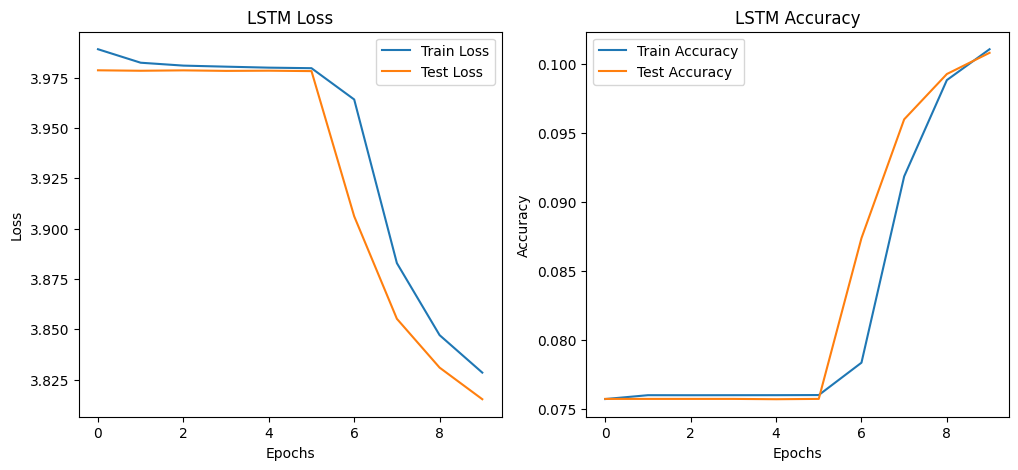


Training BiLSTM
Epoch 1/10
----------
Train loss 3.986048549123421 accuracy 0.07576271704795844
Test loss 3.979120850962931 accuracy 0.07573833517795771
Epoch 2/10
----------
Train loss 3.9812510186569616 accuracy 0.0760088370176085
Test loss 3.9784839302579105 accuracy 0.07573833517795771
Epoch 3/10
----------
Train loss 3.9801782410222244 accuracy 0.07600738068642714
Test loss 3.9787135157974363 accuracy 0.07573833517795771
Epoch 4/10
----------
Train loss 3.979726559718394 accuracy 0.07600738068642714
Test loss 3.9783031152248203 accuracy 0.07573833517795771
Epoch 5/10
----------
Train loss 3.940617065626564 accuracy 0.08194338658165576
Test loss 3.880199746502632 accuracy 0.08894972913147317
Epoch 6/10
----------
Train loss 3.862185494431668 accuracy 0.09585863101956289
Test loss 3.8380381228361298 accuracy 0.09850294169045261
Epoch 7/10
----------
Train loss 3.8380150075582984 accuracy 0.09948052666760843
Test loss 3.826453849534423 accuracy 0.10032038212850235
Epoch 8/10
-------

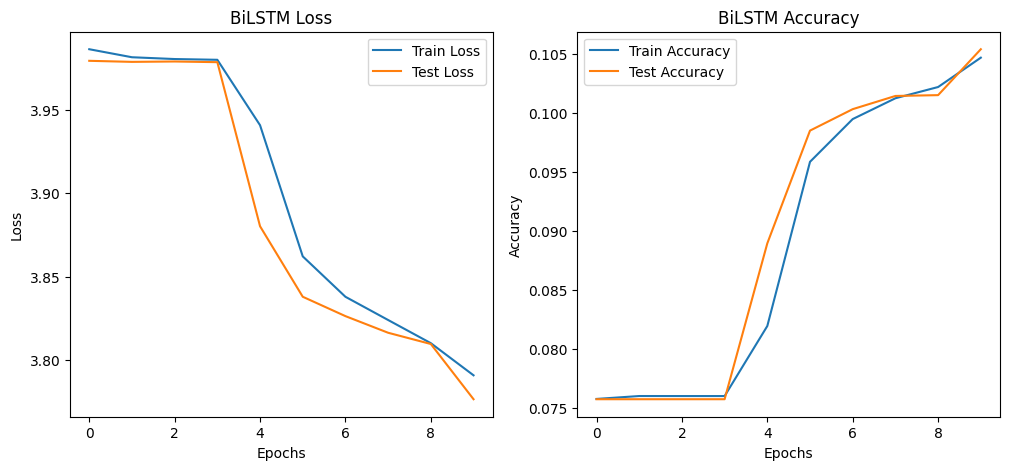


Training TextCNN
Epoch 1/10
----------
Train loss 4.038602348586998 accuracy 0.0733976352094277
Test loss 3.8816938335398796 accuracy 0.09589328362556067
Epoch 2/10
----------
Train loss 3.911266350669493 accuracy 0.09170663082150185
Test loss 3.8229141748977873 accuracy 0.10258053241684627
Epoch 3/10
----------
Train loss 3.8501633443183105 accuracy 0.09967421871472948
Test loss 3.786462068957621 accuracy 0.10685617754995048
Epoch 4/10
----------
Train loss 3.812892178808289 accuracy 0.1038495202116923
Test loss 3.760745805455285 accuracy 0.10968719053998952
Epoch 5/10
----------
Train loss 3.785553389090217 accuracy 0.10778307073254914
Test loss 3.738557590284856 accuracy 0.11305411545406885
Epoch 6/10
----------
Train loss 3.7632287432115383 accuracy 0.11062874186092911
Test loss 3.7207781932845383 accuracy 0.1158385274072348
Epoch 7/10
----------
Train loss 3.7456581583560373 accuracy 0.11310013587569921
Test loss 3.7056672858116655 accuracy 0.11841323469447194
Epoch 8/10
--------

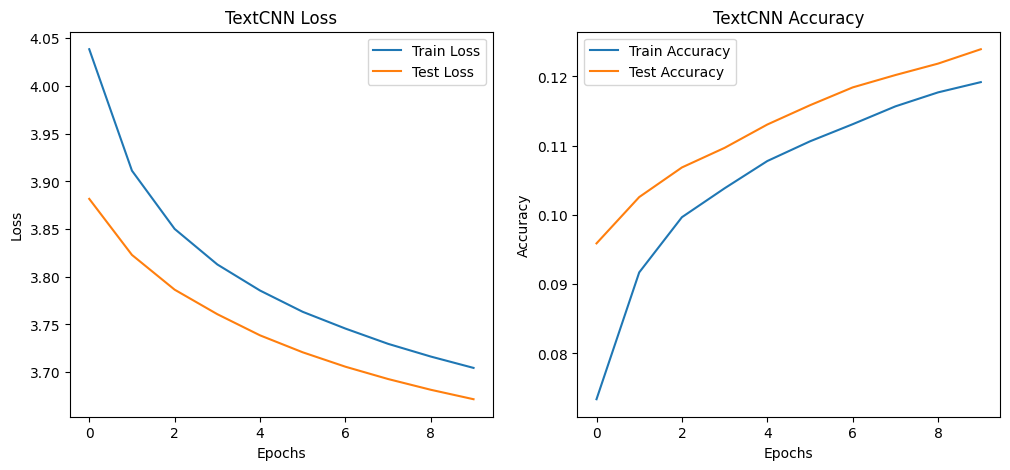

In [ ]:
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt


def train_epoch(model, data_loader, loss_fn, optimizer, device):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        labels = d["label"].to(device)

        outputs = model(input_ids)
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        optimizer.zero_grad()

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

def eval_model(model, data_loader, loss_fn, device):
    model = model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            labels = d["label"].to(device)

            outputs = model(input_ids)
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, labels)

            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

def plot_metrics(train_losses, test_losses, train_accs, test_accs, model_name):
    epochs = len(train_losses)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), train_losses, label='Train Loss')
    plt.plot(range(epochs), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), train_accs, label='Train Accuracy')
    plt.plot(range(epochs), test_accs, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.show()

# Define the training loop for each model
def train_and_evaluate(model, train_loader, test_loader, optimizer, loss_fn, device, epochs=10):
    train_losses, test_losses = [], []
    train_accs, test_accs = [], []

    for epoch in range(epochs):
        print(f'Epoch {epoch + 1}/{epochs}')
        print('-' * 10)

        train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device)
        test_acc, test_loss = eval_model(model, test_loader, loss_fn, device)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accs.append(train_acc.item())
        test_accs.append(test_acc.item())

        print(f'Train loss {train_loss} accuracy {train_acc}')
        print(f'Test loss {test_loss} accuracy {test_acc}')

    return train_losses, test_losses, train_accs, test_accs

# Main function to run the models
def main():
    models = {
        'LSTM': LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers),
        'BiLSTM': BiLSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers),
        'TextCNN': TextCNN(vocab_size, embedding_dim, output_dim, filter_sizes=[2, 3, 4], num_filters=100)
    }

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    for model_name, model in models.items():
        print(f'\nTraining {model_name}')
        model = model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=2e-5)
        loss_fn = nn.CrossEntropyLoss()

        train_losses, test_losses, train_accs, test_accs = train_and_evaluate(model, train_loader, test_loader, optimizer, loss_fn, device, epochs=10)
        plot_metrics(train_losses, test_losses, train_accs, test_accs, model_name)

        # Save the model
        torch.save(model.state_dict(), f'{model_name.lower()}_emoji_model.pth')

if __name__ == "__main__":
    main()


In [ ]:
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt


def train_epoch(model, data_loader, loss_fn, optimizer, device):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        labels = d["label"].to(device)

        outputs = model(input_ids)
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        optimizer.zero_grad()

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

def eval_model(model, data_loader, loss_fn, device):
    model = model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            labels = d["label"].to(device)

            outputs = model(input_ids)
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, labels)

            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

def plot_metrics(train_losses, test_losses, train_accs, test_accs, model_name):
    epochs = len(train_losses)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), train_losses, label='Train Loss')
    plt.plot(range(epochs), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), train_accs, label='Train Accuracy')
    plt.plot(range(epochs), test_accs, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.show()

# Define the training loop for each model
def train_and_evaluate(model, train_loader, test_loader, optimizer, loss_fn, device, epochs):
    train_losses, test_losses = [], []
    train_accs, test_accs = [], []

    for epoch in range(epochs):
        print('-' * 30)
        print(f'Epoch {epoch + 1}/{epochs}')

        train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device)
        test_acc, test_loss = eval_model(model, test_loader, loss_fn, device)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accs.append(train_acc.item())
        test_accs.append(test_acc.item())

        print(f'Train loss {train_loss} accuracy {train_acc}')
        print(f'Test loss {test_loss} accuracy {test_acc}')
        print('-' * 30)

    return train_losses, test_losses, train_accs, test_accs

# Main function to run the models
def main():
    models = {
        # 'LSTM': LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers),
        # 'BiLSTM': BiLSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers),
        'TextCNN': TextCNN(vocab_size, embedding_dim, output_dim, filter_sizes=[2, 3, 4], num_filters=100)
    }

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    for model_name, model in models.items():
        print(f'\nTraining {model_name}')
        model = model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=2e-5)
        loss_fn = nn.CrossEntropyLoss()

        train_losses, test_losses, train_accs, test_accs = train_and_evaluate(model, train_subset_dataloader,test_subset_dataloader, optimizer, loss_fn, device, epochs=75)
        plot_metrics(train_losses, test_losses, train_accs, test_accs, model_name)

        # Save the model
        torch.save(model.state_dict(), f'{model_name.lower()}_emoji_model.pth')

if __name__ == "__main__":
    main()



Training TextCNN
------------------------------
Epoch 1/75
Train loss 4.1834462703329764 accuracy 0.05022937449938106
Test loss 3.9787874425654075 accuracy 0.07549807759524642
------------------------------
------------------------------
Epoch 2/75
Train loss 4.100481829461047 accuracy 0.060409233233816355
Test loss 3.9644137075842534 accuracy 0.07806128393335664
------------------------------
------------------------------
Epoch 3/75
Train loss 4.063882622114432 accuracy 0.06658414039175709
Test loss 3.951315896661751 accuracy 0.08062449027146686
------------------------------
------------------------------
Epoch 4/75
Train loss 4.03272013739793 accuracy 0.07446297240224278
Test loss 3.938549460088453 accuracy 0.08377024350460212
------------------------------
------------------------------
Epoch 5/75
Train loss 4.012080824719559 accuracy 0.07589019150950266
Test loss 3.928573884042222 accuracy 0.0847023185366422
------------------------------
------------------------------
Epoch 6/7